1. In class we wrote code to get all of the links from the G77 statements website: https://www.g77.org/statement/index.php
Please write code that iterates through each of the links and formats them properly so that they are a readable url. Print them to the console.



In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://www.g77.org/statement"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    links = soup.find_all("a")
    url_list = []
    for link in links:
        href = link.get("href")
        if href and href != "javascript:;":
            if href[0] == "#":
                url_str = "https://www.g77.org/statement/" + href
            else:
                url_str = "https://www.g77.org" + href
            print(url_str)
            url_list.append(url_str)
else:
    print(f"Failed to retrieve content: HTTP {response.status_code}")

https://www.g77.org/statement/#jan
https://www.g77.org/statement/#jul
https://www.g77.org/statement/#feb
https://www.g77.org/statement/#aug
https://www.g77.org/statement/#mar
https://www.g77.org/statement/#sep
https://www.g77.org/statement/#apr
https://www.g77.org/statement/#oct
https://www.g77.org/statement/#may
https://www.g77.org/statement/#nov
https://www.g77.org/statement/#jun
https://www.g77.org/statement/#dec
https://www.g77.org/statement/getstatement.php?id=240215
https://www.g77.org/statement/getstatement.php?id=240208
https://www.g77.org/statement/getstatement.php?id=240207b
https://www.g77.org/statement/getstatement.php?id=240207
https://www.g77.org/statement/getstatement.php?id=240206b
https://www.g77.org/statement/getstatement.php?id=240206
https://www.g77.org/statement/getstatement.php?id=240205c
https://www.g77.org/statement/getstatement.php?id=240205b
https://www.g77.org/statement/getstatement.php?id=240205
https://www.g77.org/statement/getstatement.php?id=240202
https:

2. Now modify your code so that the urls are saved as a list. Iterate through the list, open each url, and extract the text from each, and save the text to a file called G77_2024.

In [2]:
with open("G77_2024.txt", "w") as file:
    for url in url_list:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            paragraphs = soup.find_all("p")
            statement_text = "\n".join([paragraph.text.strip() for paragraph in paragraphs])
            # Write to file only if there's meaningful content
            if statement_text:
                file.write(statement_text + "\n\n---\n\n")
        else:
            print(f"Failed to retrieve content from {url}: HTTP {response.status_code}")

3. Perform a word frequency distribution on the text and visualize the top 20 words used in these statements.( Please remove any stopwords first)

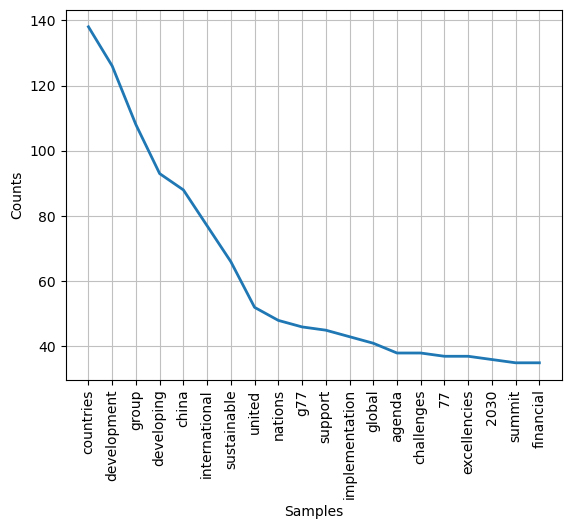

<Axes: xlabel='Samples', ylabel='Counts'>

In [3]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk import FreqDist

with open("G77_2024.txt", "r") as file:
    content = file.read()

tokens = word_tokenize(content)
stopwords = nltk.corpus.stopwords.words("english")
punctuation = string.punctuation

filtered_list = [word.lower() for word in tokens if word.lower() not in stopwords and word not in punctuation]
fdist = FreqDist(filtered_list)

fdist.plot(20)

4. Here is a link to a speech made by President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trumps speech only, remove stopwords and perform a word frequency distribution and visualize it. 

In [4]:
url = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser") 
    paragraphs = soup.find_all("p")
    start = 10
    speech_paragraphs = paragraphs[start:len(paragraphs)-2]
    speech_text = "\n".join([paragraph.text for paragraph in speech_paragraphs if "(Audience" not in paragraph.text])
else:
    print(f"Failed to retrieve content: HTTP {response.status_code}")

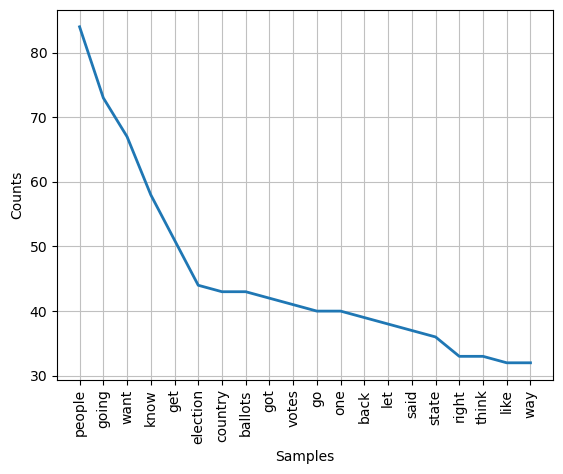

<Axes: xlabel='Samples', ylabel='Counts'>

In [5]:
speech_stopwords = stopwords + ["'s", "n't", "'re", "'ve", "'ll", "``", "''", "--"]

speech_tokens = word_tokenize(speech_text)
speech_filtered_list = [word.lower() for word in speech_tokens if word.lower() not in speech_stopwords and word not in punctuation]

fdist1 = FreqDist(speech_filtered_list)
fdist1.plot(20)

5. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt

What are the 10 most common things Donald Trump "loves?"



In [6]:
import re
import spacy
from nltk.tokenize import sent_tokenize
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# Fetch text data
url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url)
if response.status_code == 200:
    trump_text = response.content.decode('utf-8')
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize text and process sentences containing "I love"
trump_sentences = sent_tokenize(trump_text)
trump_loves_cleaned = []
for sentence in trump_sentences:
    if "i love" in sentence.lower():
        parts = re.split(r'[^\w\s]|and', sentence.lower())
        for part in parts:
            if 'love' in part:
                index = part.find('love') + len('love')
                extracted_info = part[index:].strip()
                doc = nlp(extracted_info)
                filtered_tokens = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN'] and token.text.lower() not in stopwords]
                filtered_text = ' '.join(filtered_tokens)
                if filtered_text:
                    trump_loves_cleaned.append(filtered_text)

# Output cleaned phrases and top 10 word counts
word_counts = Counter(trump_loves_cleaned)
top_10_words = word_counts.most_common(10)
for word, count in top_10_words:
    print(f"{word.capitalize()}: {count} times")

People: 12 times
China: 5 times
Mexico: 4 times
Place: 3 times
Florida: 3 times
Hispanics: 3 times
Country: 2 times
Polls: 2 times
Universe: 2 times
Area: 2 times


6. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?

In [7]:
# !pip install pycountry
import pycountry
from collections import Counter

country_dict = {country.name.lower(): 0 for country in pycountry.countries}

speech_stopwords = speech_stopwords + ["–", "’"]

trump_tokens = word_tokenize(trump_text)
trump_filtered_list = [word.lower() for word in trump_tokens if word.lower() not in speech_stopwords and word not in punctuation]

for word in trump_filtered_list:
    if word in country_dict.keys():
        country_dict[word] += 1

trump_countries = Counter(country_dict)
trump_countries.pop('america', None)
trump_countries.pop('united states of america', None)

top_5_countries = trump_countries.most_common(5)
for country, count in top_5_countries:
    print(f"{country.capitalize()}: {count} times")

China: 201 times
Mexico: 159 times
Israel: 83 times
Iraq: 72 times
Japan: 67 times


In class we talked about sentence tokenizers that could be useful in determining when sentences might be repeated. One application we discussed was in political speeches, when certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses:
"Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association.
These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."


7. Perform a frequency analysis that provides evidence for the assertion made in the Vox article. 

Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!


In [8]:
unigrams = trump_filtered_list
bigrams = [b for b in zip(unigrams[:-1], unigrams[1:])]
trigrams = [t for t in zip(unigrams[:-2], unigrams[1:-1], unigrams[2:])]
sentences = sent_tokenize(trump_text)

tokenized_data = {
    'unigrams': unigrams,
    'bigrams': bigrams,
    'trigrams': trigrams,
    'sentences': sentences
}

token_counts = {approach: Counter(variable) for approach, variable in tokenized_data.items()}

for approach, counts in token_counts.items():
    print(f"Most common tokens in {approach}:")
    print(counts.most_common(10))
    print()

Most common tokens in unigrams:
[('going', 2055), ('people', 1336), ('know', 1315), ('said', 773), ('want', 760), ('great', 687), ('get', 633), ('like', 627), ('think', 625), ('one', 592)]

Most common tokens in bigrams:
[(('united', 'states'), 117), (('hillary', 'clinton'), 101), (('going', 'happen'), 100), (('going', 'get'), 97), (('going', 'win'), 95), (('going', 'make'), 93), (('think', 'going'), 76), (('take', 'care'), 69), (('years', 'ago'), 65), (('make', 'america'), 65)]

Most common tokens in trigrams:
[(('make', 'america', 'great'), 48), (('going', 'take', 'care'), 39), (('going', 'build', 'wall'), 20), (('going', 'happen', 'going'), 20), (('make', 'country', 'great'), 19), (('thank', 'thank', 'much'), 18), (('going', 'make', 'america'), 18), (('thank', 'much', 'everybody'), 17), (('going', 'pay', 'wall'), 17), (('going', 'bring', 'back'), 17)]

Most common tokens in sentences:
[('Okay?', 117), ('Right?', 102), ('Thank you.', 64), ('Believe me.', 27), ('It’s true.', 24), ('Th

<span style="color:blue"> 
  The results of tokenizing by unigrams show the verbs that were most frequently used in his speeches. The results of tokenizing by bigrams highlight Trump's strategy of attacking Hillary Clinton, comparing to the past, and envisioning the future. The results of tokenizing by trigrams highlight Trump's slogans of "Make America Great Again" and "Build the Wall." The results of tokenizing by whole sentences highlight Trump's linguistic characteristics. Trump is good at establishing a casual relationship with his audience, as the most frequent sentences in his speeches are conversational in nature, rather than mere statements and facts. These frequently used sentences convey his urgency for the audience to trust him, supporting Lakoff's statement that Trump often uses these immediately after making baseless or untrue statements.
</span>

8.Sentiment Analysis
Sentiment analysis, also known as opinion mining or emotion AI, is a field of natural language processing (NLP) that focuses on identifying and categorizing opinions or sentiments expressed within text data. The primary goal is to determine the writer's or speaker's attitude towards a particular topic, product, service, or overall context. This attitude can range from positive, negative, to neutral, and may also encompass more nuanced emotions like happiness, anger, sadness, quantitative or emotional.


The most basic form of sentiment analysis assigns values to words based on a dictionary of words, from neutral to slightly positive or negative, moderately positive or negative, and extremely positive or negative. Vader is a popular package that analyzes sentiment.

In [9]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


This will compute a compound score by summing the valence scores of each word int he lexicon and then bnormalized between -1 (most negative) and +1 most positive. This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a "normalize, weighted composite score" is accurate.

let's test opur first sentiment using VADER. VADER is great on social media data which can be messy and contain emojis.
We will use the polarity_scores( ) method to obtain the polarity indices.

In [10]:
sentence = "I love that movie!"
score = analyzer.polarity_scores(sentence)
print(score)

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}


In [11]:
sentence2 = "OMG, this job totally SUX!!"
score = analyzer.polarity_scores(sentence2)
print(score)

{'neg': 0.507, 'neu': 0.493, 'pos': 0.0, 'compound': -0.6261}


In [12]:
sentence3 = '😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence3)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}


In [13]:
sentence4 = '😀 😀 😀 😀 😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence4)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.8885}


The global financial crisis (GFC) refers to the period of extreme stress in global financial markets and banking systems between mid 2007 and early 2009. During the GFC, a downturn in the US housing market was a catalyst for a financial crisis that spread from the United States to the rest of the world through linkages in the global financial system. Many banks around the world incurred large losses and relied on government support to avoid bankruptcy. Millions of people lost their jobs as the major advanced economies experienced their deepest recessions since the Great Depression in the 1930s.

The Federal Reserve conference calls are a good way to track the sentiment that the Fed had toward the crisis. Did they know how bad it was? Did they think they could fix it? Starting in January of 2008, ending in October of 2008 map the sentiment of the Fed reserve calls.

Here are your documents:

Jan 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf

Mar 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf

July 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf

Sept 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf

Oct 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf


You will need to convert these pdf into text to process. 
1. Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.
2. Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?
3. Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up gettting.
4. Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?
5. Add key makers to your visualization that bring in the key events of 2008.

<span style="color:blue"> I approach this question by first reading in the text, cleaning it, and then conducting the analysis.
</span>

In [14]:
import fitz

def are_first_two_words_uppercase(text):
    """
    Check if the first two words of a text are uppercase.
    Args:
        text (str): The input text to check.
    Returns:
        bool: True if the first two words are uppercase, False otherwise.
    """
    words = text.split()
    if len(words) >= 2:
        first_word_upper = words[0].isupper()
        second_word_upper = words[1].isupper()
        return first_word_upper and second_word_upper
    else:
        return False
    
def extract_speakers(text):
    """
    Extract the speaker from a text.
    Args:
        text (str): The input text containing the speaker's name.
    Returns:
        str: The extracted speaker's name.
    """
    if text.split(".")[0] == "MR" or text.split(".")[0] == "MS":
        speakers = re.findall(r'^[A-Z]+\.\s[A-Z]+\s?[A-Z]*', text, re.MULTILINE)
    else:
        speakers = re.findall(r'^[A-Z ]+', text, re.MULTILINE)
    return speakers[0]

In [20]:
def process_pdf(file_path):
    """
    Process a PDF file and extract speech list and dictionary.
    Args:
        file_path (str): The path to the PDF file.
    Returns:
        tuple: A tuple containing the extracted text and the dictionary of speeches by speaker.
    """
    document = fitz.open(file_path)
    text = ""
    
    # Iterate over each page starting from the third page
    for page_num in range(2, len(document)):
        page = document.load_page(page_num)
        text += page.get_text()

    # Split the text into paragraphs
    paragraphs = text.replace("\n\n", "\n")
    paragraphs = paragraphs.split("\n")

    # Filter out irrelevant headers and footers
    date = paragraphs[1].strip()
    filtered_list = [s for s in paragraphs if date not in s and f"of {len(document)}" not in s and s.strip()]
    filtered_list.pop(0)

    speech_list = []
    speech = ""
    for item in filtered_list:
        # Check if the first two words are uppercase, indicating a new speaker
        if are_first_two_words_uppercase(item):
            # If it's a new speaker, add the previous speech to the list and start a new speech
            if speech.strip():
                speech_list.append(speech.strip())
            speech = item
        else:
            # If it's part of the same speech, append it to the current speech
            speech += " " + item

    # Clean up the speeches by removing extra spaces
    for i in range(len(speech_list)):
        speech_list[i] = speech_list[i].replace("  ", " ")

    # Extract the speakers from the speeches and create a set of unique speakers
    speaker_list = [extract_speakers(speech) for speech in speech_list]
    speaker_set = set(speaker_list)

    # Initialize an empty dictionary to store speeches by speaker
    speech_dict = {speaker: "" for speaker in speaker_set}

    # Iterate over each speech and update the corresponding entry in the speech dictionary
    for speech in speech_list:
        speaker = extract_speakers(speech)
        speech_new = speech.replace(speaker + '. ', '')  # Remove the speaker's name from the speech
        if speech_dict[speaker]:
            speech_dict[speaker] += " " + speech_new.strip()  # Append the modified speech to the dictionary entry
        else:
            speech_dict[speaker] += speech_new.strip()  # If it's the first speech by the speaker, assign it directly

    return text, speech_dict  # Return the extracted text and the dictionary of speeches by speaker

#### Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.

FOMC20080121confcall.pdf


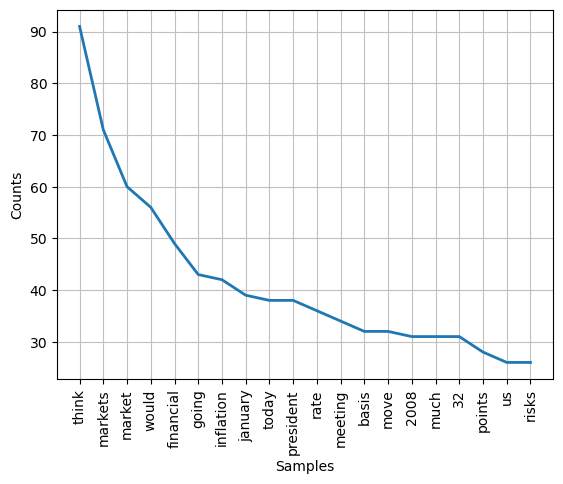

FOMC20080310confcall.pdf


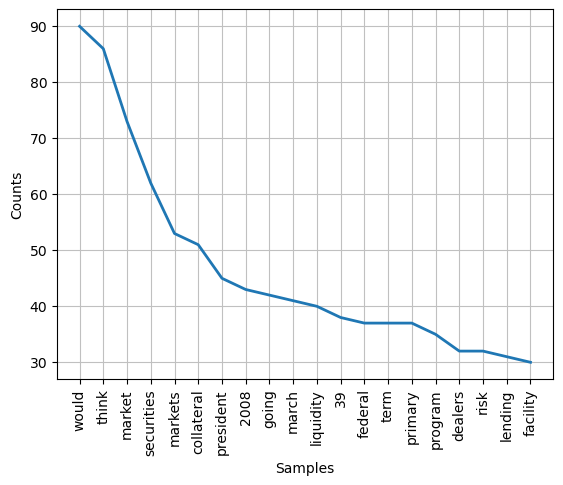

FOMC20080724confcall.pdf


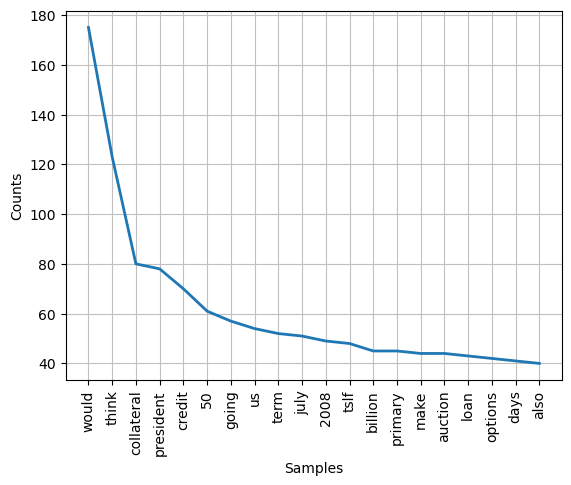

FOMC20080929confcall.pdf


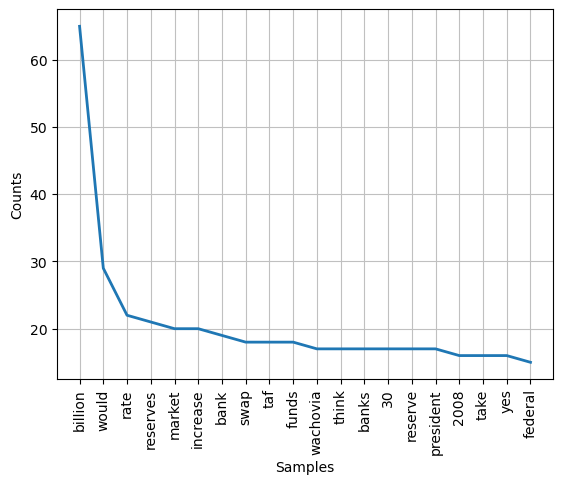

FOMC20081007confcall.pdf


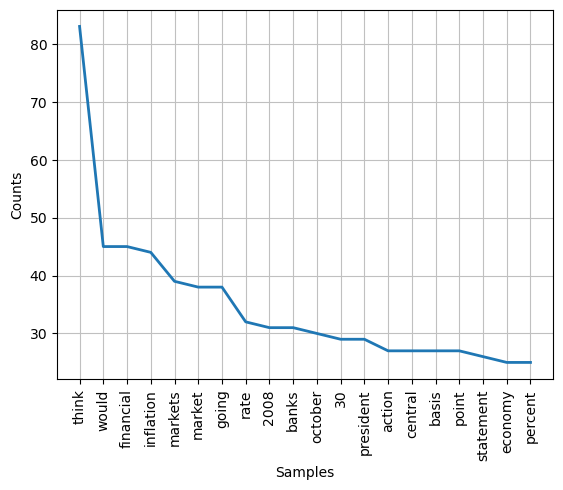

In [52]:
def analyze_word_frequency_for_files(file_name):
    """
    Analyzes and plots the frequency of non-stop words in a PDF file.
    Parameters:
    - file_name (str): Path to the PDF file.
    Outputs:
    - A plot of the top 20 most frequent non-stop words in the file.
    """
    text, speech_dict = process_pdf(file_name)
    
    words_list = [word.lower() for key in speech_dict for word in key.split()]
    stopwords_new = stopwords + words_list + ['’', 'thank', file_name[10:12], file_name[11:12]]
    
    tokens = word_tokenize(text)
    text_filtered_list = [word.lower() for word in tokens if word.lower() not in stopwords_new and word not in punctuation]

    fdist1 = FreqDist(text_filtered_list)
    fdist1.plot(20)
    
pdf_files = ["FOMC20080121confcall.pdf", "FOMC20080310confcall.pdf", 
             "FOMC20080724confcall.pdf", "FOMC20080929confcall.pdf", 
             "FOMC20081007confcall.pdf"]

for file in pdf_files:
    print(file)
    analyze_word_frequency_for_files(file)

#### Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?

In [70]:
import numpy as np
import spacy

# spacy.cli.download("en_core_web_sm")
# nlp = spacy.load("en_core_web_sm")

def analyze_similar(file_name):
    text, speech_dict = process_pdf(file_name)
    similar = []
    
    for text in speech_dict.values():
        speech_sentences = sent_tokenize(text)
        
        for sentence in speech_sentences:
            target = "What the US and world is going through is unlike anything that has ever before been experienced."
        
            doc1 = nlp(target)
            doc2 = nlp(sentence)

            # Get the embeddings for each paragraph
            paragraph1_embedding = doc1.vector
            paragraph2_embedding = doc2.vector

            similarity_score = np.dot(paragraph1_embedding, paragraph2_embedding) / (np.linalg.norm(paragraph1_embedding) * np.linalg.norm(paragraph2_embedding))
            if similarity_score > 0.6:
                similar.append(sentence)
    
    print(similar)
            
pdf_files = ["FOMC20080121confcall.pdf", "FOMC20080310confcall.pdf", 
             "FOMC20080724confcall.pdf", "FOMC20080929confcall.pdf", 
             "FOMC20081007confcall.pdf"]

for file in pdf_files:
    analyze_similar(file)

['Do we know at all what the ECB and the Bank of England are considering given that the markets were open and they are the ones who have seen markets and know what is going on there today?', 'Governor Kohn’s points notwithstanding, and it was very difficult to know ex ante what was right, if there is a concern there it has to do with how quickly the rate was raised starting in 2004 going forward, when the economy was already on a growth path.', 'I am very concerned that we are going to be interpreted as reacting to the stock market declines, and I think my concern is that lowering the funds rate terribly rapidly with intermeeting moves is going to set up a dynamic that is going to drive us into more and more of these and drive the markets into expecting more and more from us.', 'Of course, the inflation numbers haven’t been all that I might have hoped for, and even core inflation has been running a little higher than I thought it would.', 'But based on what has happened in the last sev

#### Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up getting.

In [75]:
import numpy as np
import spacy

# spacy.cli.download("en_core_web_sm")
# nlp = spacy.load("en_core_web_sm")

def analyze_similar(file_name):
    text, speech_dict = process_pdf(file_name)
    similar = []
    
    for text in speech_dict.values():
        speech_sentences = sent_tokenize(text)
        
        for sentence in speech_sentences:
            target = "The situation could be quickly remedied and would not get as bad as it ended up getting."
        
            doc1 = nlp(target)
            doc2 = nlp(sentence)

            # Get the embeddings for each paragraph
            paragraph1_embedding = doc1.vector
            paragraph2_embedding = doc2.vector

            similarity_score = np.dot(paragraph1_embedding, paragraph2_embedding) / (np.linalg.norm(paragraph1_embedding) * np.linalg.norm(paragraph2_embedding))
            if similarity_score > 0.6:
                similar.append(sentence)
    
    print(similar)
            
pdf_files = ["FOMC20080121confcall.pdf", "FOMC20080310confcall.pdf", 
             "FOMC20080724confcall.pdf", "FOMC20080929confcall.pdf", 
             "FOMC20081007confcall.pdf"]

for file in pdf_files:
    analyze_similar(file)

['I am concerned also how severe a recession could be.', 'So their losses are going to be realized only very gradually over a long period of time.', 'I didn’t really feel as though my contacts there were focused exclusively on the financial guarantors.', 'None of us can know for sure what the next nine days would be like if we did not act.', 'It is a very daunting thought to think about a crisis that you might have avoided had you just taken certain actions.', 'The desire is to intervene, to get the market rates down, and to bring confidence; but then our ability to pull out of that is compromised because we can’t be sure in an uncertain world of how strongly the economy might be coming out of something.', 'I do not wish to be dissenting on this, as troubled as I am about it.', 'They have not made an explicit recession call, but they do forecast very weak growth going forward.', 'He has made I think a case for being more aggressive initially, trying to address the problem, and then rem

['The actual draws on these lines may turn out to be considerably less, and the amounts that are actually drawn are likely to depend on market conditions.', 'Our strategy all along has been not to prevent the deleveraging or the unwinding that developed earlier but to stretch it out a little so fewer things break.', 'But we don’t have anything that is close to being put forward at this time.', 'It may well be the case, as I mentioned, that we’ll be proposing a further narrowing of the excess reserves rate as we get experience, and we may, indeed, have to do that if our ability to drain reserves is otherwise constrained.', 'They didn’t think they could survive without a lot of support today.']
['I would just say that there is substantial risk that this will get substantially worse before it gets better, and we may have to do further escalation on a range of fronts.', 'It is likely that this period eventually will be labeled a recession.', 'I don’t have an awful lot to add to what has al

#### Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?

In [17]:
def analyze_sentiment_for_files(file_name):
    """
    Analyze sentiment for a single PDF file.
    Parameters:
    - file_name (str): The name of the PDF file.
    Returns:
    - sentiment_scores_dict (dict): A dictionary where keys are speaker names and values are sentiment scores.
    """
    sentiment_scores_dict = {}
    
    # Process the PDF file to extract speeches
    text, speech_dict = process_pdf(file_name)
    for speaker, speech in speech_dict.items():
        sentences_score = analyzer.polarity_scores(speech)
        sentiment_scores_dict[speaker] = sentences_score

    return sentiment_scores_dict

In [95]:
import pandas as pd

pdf_files = ["FOMC20080121confcall.pdf", "FOMC20080310confcall.pdf", 
             "FOMC20080724confcall.pdf", "FOMC20080929confcall.pdf", 
             "FOMC20081007confcall.pdf"]

sentiment_scores_for_files = []

for file in pdf_files:
    sentiment_scores_for_file = analyze_sentiment_for_files(file)
    sentiment_scores_for_files.append(sentiment_scores_for_file)

dfs = []
for i, sentiment_scores in enumerate(sentiment_scores_for_files):
    df = pd.DataFrame.from_dict(sentiment_scores, orient='index')
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Speaker'}, inplace=True)
    df['Date'] = pd.to_datetime(pdf_files[i][4:12], format='%Y%m%d')
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)
speaker_counts = df_combined['Speaker'].value_counts()
filtered_speakers = speaker_counts[speaker_counts == 5]

filtered_df = df_combined[df_combined['Speaker'].isin(filtered_speakers.index)]
print(filtered_df)

                   Speaker    neg    neu    pos  compound       Date
0            MR. ROSENGREN  0.210  0.674  0.116   -0.8713 2008-01-21
2               MR. DUDLEY  0.066  0.847  0.087    0.9788 2008-01-21
3   VICE CHAIRMAN GEITHNER  0.108  0.802  0.090   -0.7760 2008-01-21
5        CHAIRMAN BERNANKE  0.082  0.785  0.133    0.9994 2008-01-21
6              MR. PLOSSER  0.073  0.834  0.094    0.9401 2008-01-21
7               MS. YELLEN  0.131  0.697  0.172    0.8575 2008-01-21
9               MR. LACKER  0.037  0.856  0.107    0.9515 2008-01-21
15               MR. EVANS  0.038  0.792  0.170    0.9559 2008-01-21
16              MS. DANKER  0.056  0.767  0.177    0.9875 2008-01-21
18  VICE CHAIRMAN GEITHNER  0.093  0.796  0.111    0.9511 2008-03-10
22           MR. ROSENGREN  0.069  0.784  0.147    0.8708 2008-03-10
27              MR. DUDLEY  0.072  0.778  0.151    0.9996 2008-03-10
28       CHAIRMAN BERNANKE  0.034  0.818  0.148    0.9996 2008-03-10
29             MR. PLOSSER  0.064 

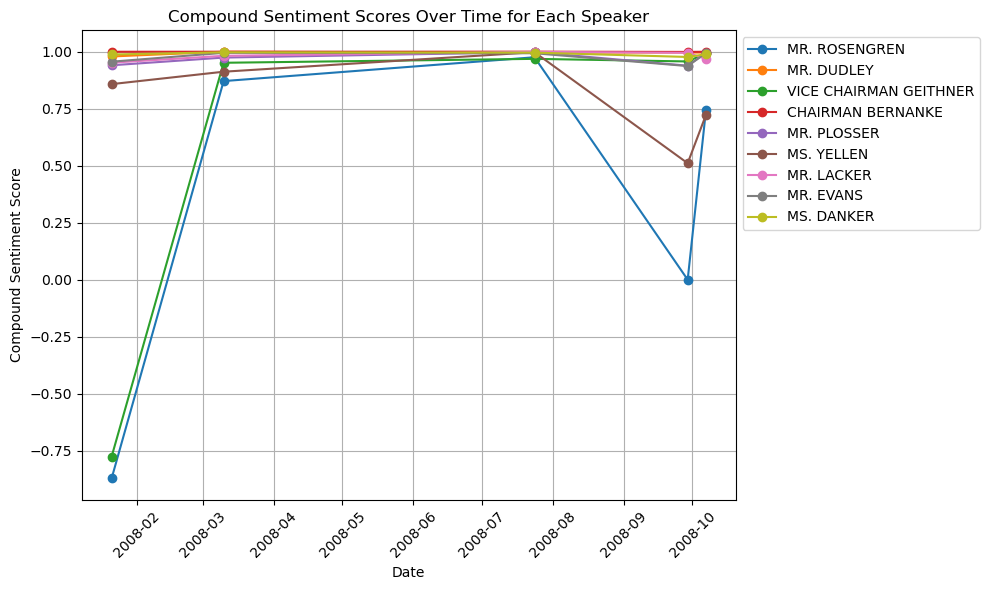

In [94]:
import matplotlib.pyplot as plt

data = filtered_df

# Plot compound sentiment scores over time for each speaker
plt.figure(figsize=(10, 6))
speakers = data['Speaker'].unique()  # Get unique speakers

for speaker in speakers:
    # Filter data for the current speaker
    speaker_data = data[data['Speaker'] == speaker]
    
    # Plot compound sentiment scores
    plt.plot(speaker_data['Date'], speaker_data['compound'], marker='o', label=speaker)

# Customize plot
plt.title('Compound Sentiment Scores Over Time for Each Speaker')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.grid(True)  # Enable grid for better readability
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend
plt.tight_layout()  # Adjust layout to not cut off labels

# Create a custom legend
plt.legend(labels=speakers, loc='upper left', bbox_to_anchor=(1, 1), ncol=len(top_speakers)//6)

# Show plot
plt.show()


### Add key makers to your visualization that bring in the key events of 2008.

9. Sentiment analysis is not a perfect science, especially when you are using off-the-shelf packages like VADER. Given what you know about the crisis, do you trust Vader's sentiment analysis? WHy or why not?

#Your answer here:


10. Can you reasonably determine whether a low or negative compound score indicates a negative sentiment from the Fed in 2008? Can you do so with data only from 2008?

Provide a reasonable comparison from 2008 values by comparing it to some other timeframe from the FED confernce call historic database. https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm

In [ ]:
#Your code here: